In [56]:
import numpy as np 
import pandas as pd 
import seaborn as sns #
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from plotly.offline import init_notebook_mode, iplot 
init_notebook_mode(connected=True) 
from sklearn.preprocessing import PowerTransformer
from yellowbrick.cluster import KElbowVisualizer
import lightgbm as lgb
import plotly.graph_objs as go 
import plotly.plotly as py 
import os
import warnings   

In [57]:
print(2151264683%16+1)
print(2151264683%16+2)
print(2151264683%16+3)

12
13
14


In [58]:
df =pd.read_csv("../data/GiaSMPvaSMPcap2021.csv",encoding="ISO-8859-1",delimiter=";")
df.set_index("Ngay", inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Ngay,,,,,,,,,,,,,,,,,,,,,
01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.1,1002.0,1002.0
28/12/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,...,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0
29/12/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [59]:
feats= ['12','13','14']

In [60]:

data = df[feats]
data

,12,13,14
Ngay,,,
01/01/2021,964.4,964.4,964.4
01/02/2021,1019.7,1019.7,1019.7
01/03/2021,988.4,988.4,988.4
01/04/2021,1010.8,1010.8,1010.8
01/05/2021,1061.5,1061.5,1061.5
...,...,...,...
27/12/2021,1002.0,1002.0,1002.1
28/12/2021,1002.0,1002.0,1002.0
29/12/2021,1061.5,1061.5,1061.5


# EDA


## Trực quan hóa phân phối các cột dữ liệu

In [61]:
# Thống kê mô tả của các cột dữ liệu
print("\nThống kê mô tả của các cột dữ liệu:")
data.describe()


Thống kê mô tả của các cột dữ liệu:


,12,13,14
count,365.000000,365.000000,365.000000
mean,1040.311507,1040.312329,1040.314521
std,105.147065,105.146765,105.145787
min,885.700000,885.700000,885.700000
25%,988.400000,988.400000,988.400000
50%,1022.600000,1022.600000,1022.600000
75%,1061.500000,1061.500000,1061.600000
max,1565.500000,1565.500000,1565.500000


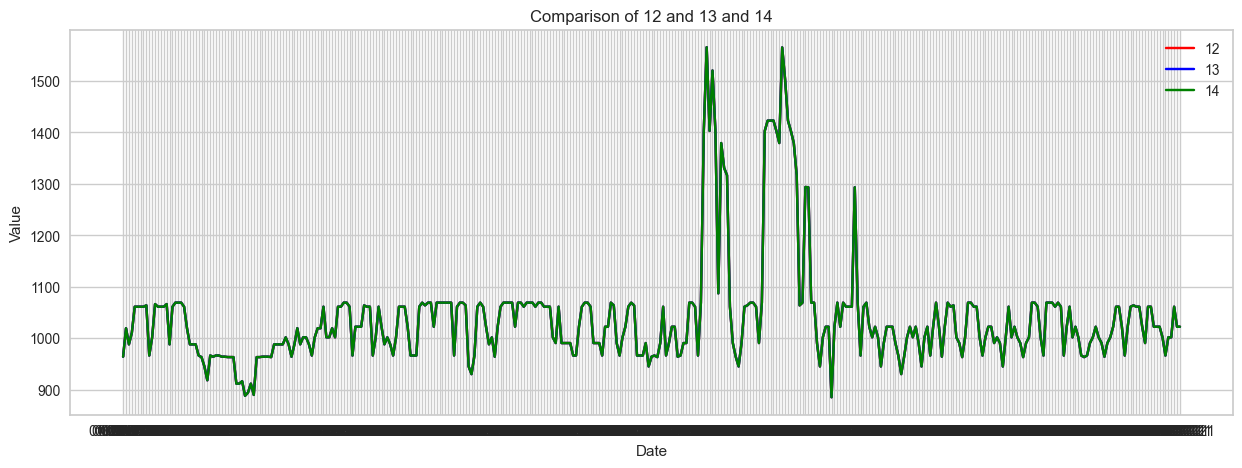

In [88]:
plt.figure(figsize=(15,5))
plt.plot(data['12'],color = 'red',label = '12')
plt.plot(data['13'],color = 'blue',label = '13')
plt.plot(data['14'],color = 'green',label = '14')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison of 12 and 13 and 14')
plt.legend()
plt.show()

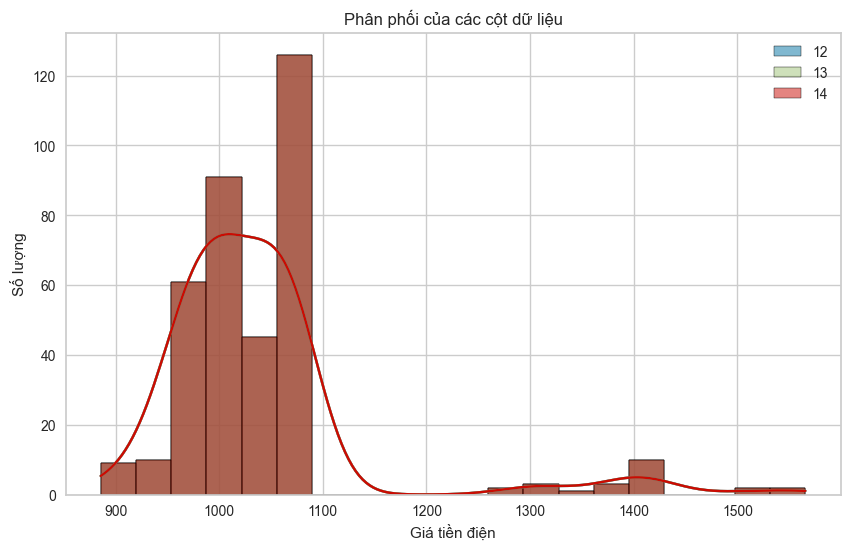

In [65]:
# Trực quan hóa phân phối của các cột dữ liệu
plt.figure(figsize=(10, 6))
for column in data.columns:
    sns.histplot(data[column], bins=20, kde=True, label=column)
plt.xlabel("Giá tiền điện")
plt.ylabel("Số lượng")
plt.title("Phân phối của các cột dữ liệu")
plt.legend()
plt.show()

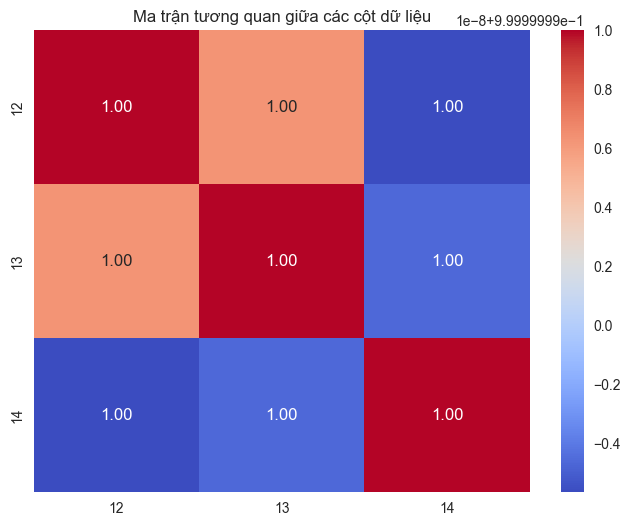

In [66]:
# Kiểm tra mối quan hệ giữa các cột dữ liệu
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các cột dữ liệu")
plt.show()

## Kiểm tra và xử lý dữ liệu còn thiếu.

In [67]:
# Kiểm tra dữ liệu thiếu
missing_data = data.isnull().sum()
print("Dữ liệu thiếu:")
print(missing_data)


Dữ liệu thiếu:
12    0
13    0
14    0
dtype: int64


## Xử lý ngoại lệ nếu có.

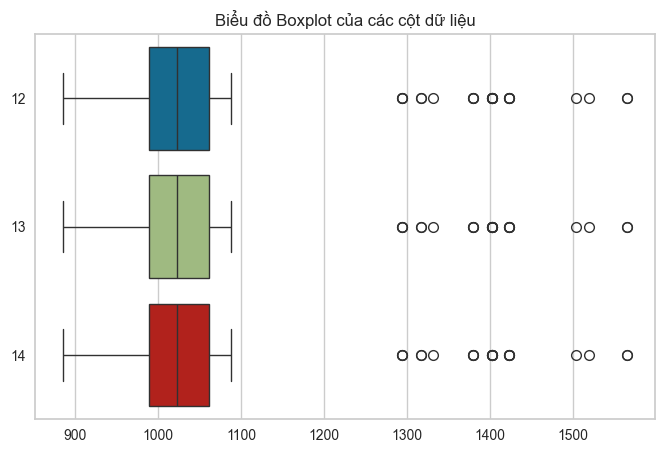

In [68]:
# Trực quan hóa boxplot để phát hiện ngoại lệ
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, orient="h")
plt.title("Biểu đồ Boxplot của các cột dữ liệu")
plt.show()


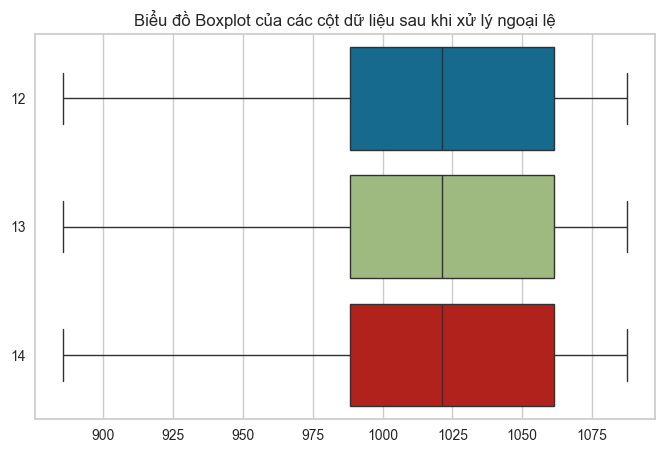

In [69]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Xác định ngưỡng trên và dưới
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Loại bỏ các ngoại lệ
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]
    return data_no_outliers

# Xử lý ngoại lệ cho mỗi cột dữ liệu
data_no_outliers = data.copy()
for column in data.columns:
    data_no_outliers[column] = remove_outliers_iqr(data[column])

# Trực quan hóa lại boxplot sau khi xử lý ngoại lệ
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_no_outliers, orient="h")
plt.title("Biểu đồ Boxplot của các cột dữ liệu sau khi xử lý ngoại lệ")
plt.show()


# Kalman

In [70]:
data_no_outliers.shape

(365, 3)

## Xây dựng mô hình Kalman cho từng cột dữ liệu điện.

C:\Users\Admin\AppData\Local\Temp\ipykernel_18732\2551159785.py:15: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\Admin\AppData\Local\Temp\ipykernel_18732\2551159785.py:26: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Dự báo điểm tiếp theo: 1022.8280222739036


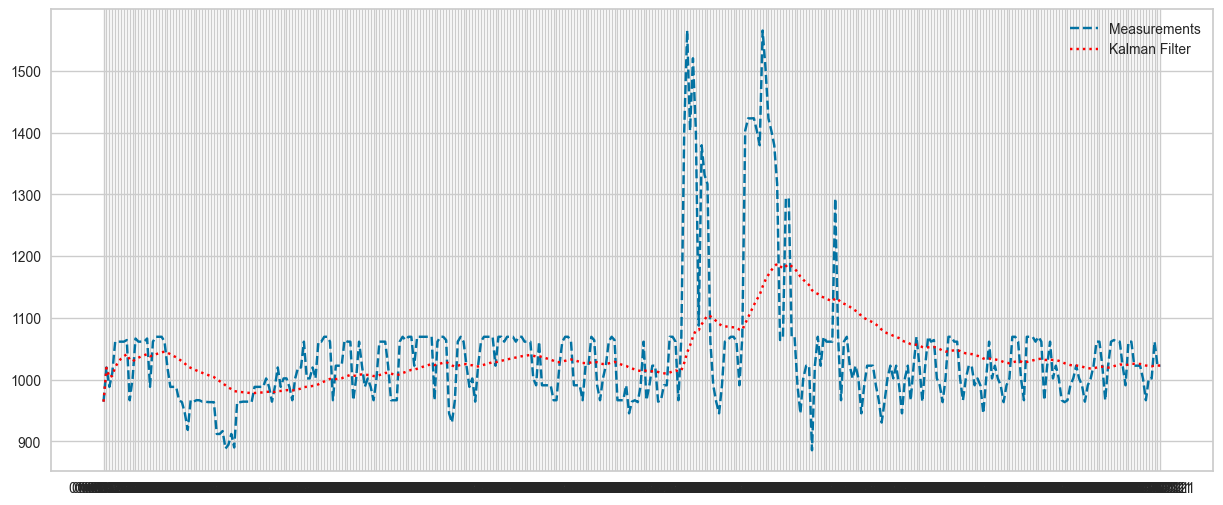

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Định nghĩa các tham số
Q = 1e-5  # Hiệp phương sai của quá trình (process variance)
R = 0.01  # Hiệp phương sai của đo lường (measurement variance)
n_timesteps = len(data['12'])
xhat = np.zeros(n_timesteps)  # Ước lượng trạng thái ban đầu (a posteri estimate of x)
P = np.zeros(n_timesteps)  # Ước lượng hiệp phương sai của lỗi (a posteri error estimate)
xhatminus = np.zeros(n_timesteps)  # Trạng thái dự đoán (a priori estimate of x)
Pminus = np.zeros(n_timesteps)  # Dự đoán hiệp phương sai của lỗi (a priori error estimate)
K = np.zeros(n_timesteps)  # Kalman gain

# Khởi tạo giá trị ban đầu
xhat[0] = data['12'][0]  # data['12'] là cột dữ liệu cần dự đoán
P[0] = 1.0

# Kalman filter
for k in range(1, n_timesteps):
    # Dự đoán (predict)
    xhatminus[k] = xhat[k-1]
    Pminus[k] = P[k-1] + Q

    # Cập nhật (update)
    K[k] = Pminus[k] / (Pminus[k] + R)
    xhat[k] = xhatminus[k] + K[k] * (data['12'][k] - xhatminus[k])
    P[k] = (1 - K[k]) * Pminus[k]

# Dự báo điểm tiếp theo
xhat_next = xhat[-1]
P_next = P[-1] + Q
K_next = P_next / (P_next + R)
prediction = xhat_next

print(f'Dự báo điểm tiếp theo: {prediction}')

# Vẽ kết quả
plt.figure(figsize=(15, 6))
plt.plot(data['12'], label='Measurements', linestyle='dashed')
plt.plot(xhat, label='Kalman Filter', linestyle='dotted',color='red')

plt.legend()
plt.show()


# Other model

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



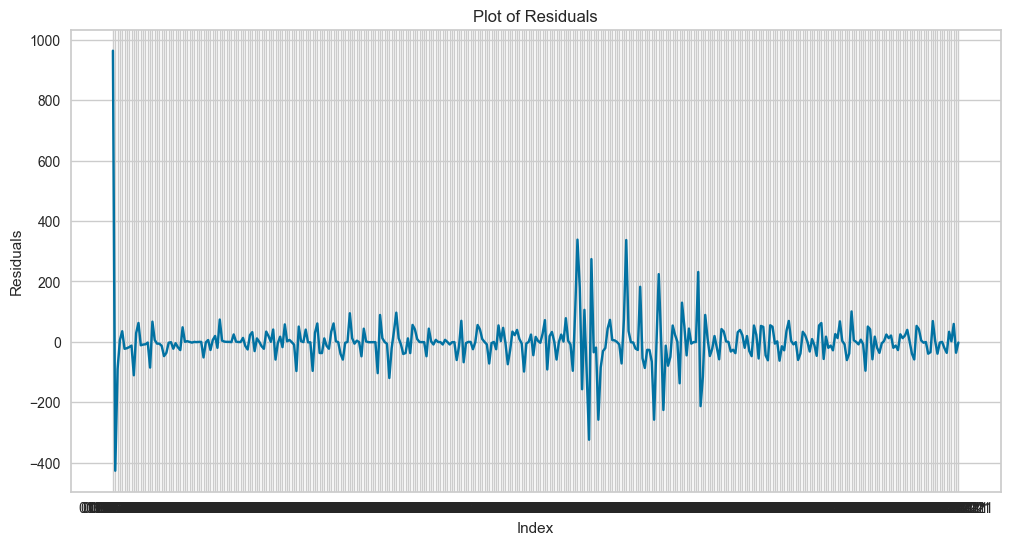

In [83]:
import matplotlib.pyplot as plt

# Giả sử model_fit là kết quả sau khi fit mô hình ARIMA
model = ARIMA(data['12'], order=(1,2,1))
model_fit = model.fit()

# Vẽ biểu đồ residuals
plt.figure(figsize=(12,6))
residuals = model_fit.resid
plt.plot(residuals)
plt.xlabel('Index')  # Chỉ số mẫu là thích hợp hơn cho trục x
plt.ylabel('Residuals')  # Residuals nên nằm trên trục y
plt.title('Plot of Residuals')
plt.show()


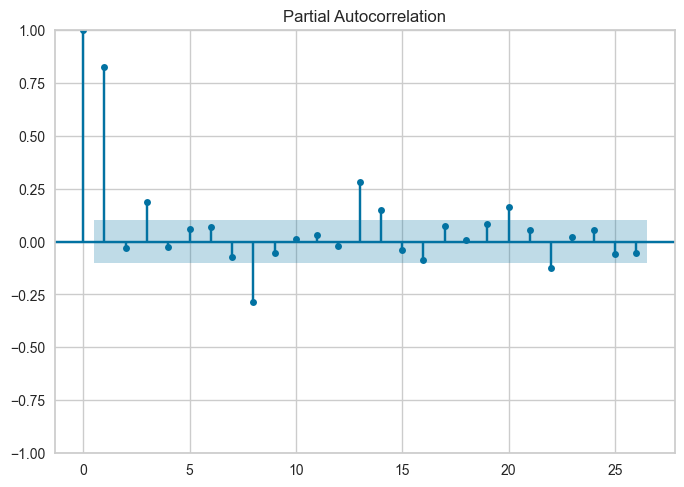

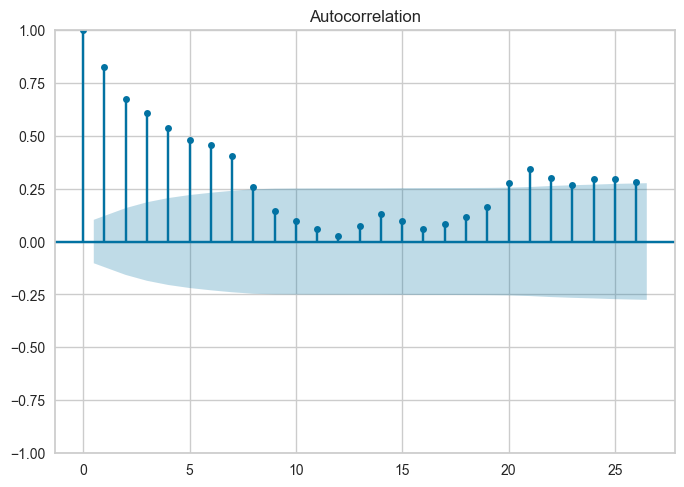

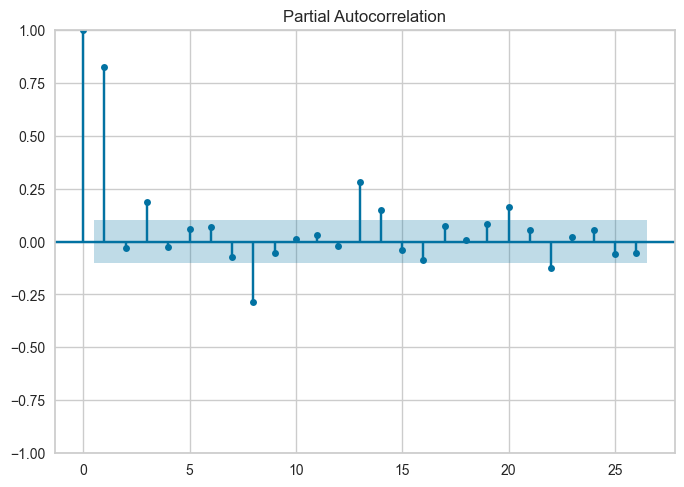

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data['12'])
plot_pacf(data['12'])

In [86]:
from statsmodels.tsa.arima.model import ARIMA

# Giả sử bạn chọn p=1, d=1, q=1 sau khi phân tích
model = ARIMA(data['12'], order=(1,1,1))
model_fit = model.fit()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.



In [87]:
# Dự báo 5 bước tiếp theo
forecast = model_fit.forecast(steps=5)
print(forecast)


365    1024.305436
366    1025.688295
367    1026.809591
368    1027.718798
369    1028.456031
Name: predicted_mean, dtype: float64


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.

